# Playground Series - Season 3, Episode 9

### Detailed feature description and feature engineering by ChatGPT
Feature description
I have no ideas about the 'concrete' domain and the features used in this episode. The provided description "Amount of X is mixed" isn't informative enough for me. So, I consulted ChatGPT to provide detailed description.

I took a step further to ask it to give me a 5-level scale of importance in predicting the concrete strength. Take it with a pinch of salt and do the EDA yourself to verify!

##### CementComponent: 
Cement is the primary binding agent in concrete, and it is responsible for the strength and durability of the material. The amount of cement used in the mixture significantly affects the strength of the resulting concrete, with higher amounts of cement generally leading to stronger concrete. However, using too much cement can also lead to brittleness and cracking. Therefore, the CementComponent feature is one of the most important features in predicting the strength of concrete.

* Importance scale: 5/5

#### BlastFurnaceSlag:
Blast furnace slag is a by-product of iron production, and it is often used as a substitute for cement in concrete. When mixed with cement, it can improve the strength, durability, and workability of concrete. The amount of BlastFurnaceSlag used in the mixture can significantly affect the strength of the resulting concrete, with higher amounts generally leading to stronger concrete. Therefore, the BlastFurnaceSlag feature is also an important predictor of concrete strength.

* Importance scale: 4/5

FlyAshComponent: Fly ash is another by-product of industrial processes, and it is also often used as a substitute for cement in concrete. When used in concrete, it can improve the workability, durability, and strength of the material. The amount of FlyAshComponent used in the mixture can significantly affect the strength of the resulting concrete, with higher amounts generally leading to stronger concrete. Therefore, the FlyAshComponent feature is an important predictor of concrete strength.
Importance scale: 4/5

#### WaterComponent:
Water is a critical component of concrete, as it is necessary for the chemical reaction that binds the cement and other materials together. However, using too much or too little water can significantly affect the strength of the resulting concrete. Using too much water can lead to weaker concrete, while using too little water can lead to concrete that is too dry and difficult to work with. Therefore, the WaterComponent feature is also an important predictor of concrete strength.

* Importance scale: 4/5

#### SuperplasticizerComponent:
Superplasticizers are chemical additives that are used to improve the workability and flowability of concrete without increasing the amount of water in the mixture. By reducing the amount of water needed, superplasticizers can also help to increase the strength and durability of the resulting concrete. Therefore, the SuperplasticizerComponent feature can be an important predictor of concrete strength.

* Importance scale: 3/5

#### CoarseAggregateComponent:
Coarse aggregate is a type of gravel or crushed stone that is used in concrete to provide strength and structure to the material. The amount and size of the coarse aggregate used can significantly affect the strength and workability of the resulting concrete. Therefore, the CoarseAggregateComponent feature is an important predictor of concrete strength.

* Importance scale: 3/5

#### FineAggregateComponent: 
Fine aggregate is a type of sand that is used in concrete to fill in the spaces between the larger coarse aggregate. The amount and type of fine aggregate used can also significantly affect the strength and workability of the resulting concrete. Therefore, the FineAggregateComponent feature is also an important predictor of concrete strength.

* Importance scale: 3/5

#### AgeInDays:
The AgeInDays feature represents the number of days that have passed since the concrete was poured. As concrete ages, it undergoes a process called hydration, in which the cement and water react to form a stronger bond. The strength of the resulting concrete increases over time, and the AgeInDays feature can be used to predict the strength of the concrete at a particular point in time. However, the rate of strength gain varies depending on the specific mixture of materials and environmental conditions, and there is often an optimal time at which the concrete reaches its maximum strength. Therefore, the AgeInDays feature can be an important predictor of concrete strength, but it must be considered in conjunction with the other features to accurately predict the strength of the concrete.

* Importance scale: 2/5

## Feature engineering
TotalComponentWeight: This feature could be calculated by summing the weights of all the components used in the concrete mixture. This would provide a measure of the total weight of all the ingredients in the mixture, which could be an important predictor of strength. The formula for this feature would be:

TotalComponentWeight = CementComponent + BlastFurnaceSlag + FlyAshComponent + WaterComponent + SuperplasticizerComponent + CoarseAggregateComponent + FineAggregateComponent

Water-Cement-Ratio (WCR): This feature could be calculated by dividing the weight of water by the weight of cement used in the mixture. This ratio is an important factor in determining the strength of concrete, as a higher ratio can lead to weaker concrete. The formula for this feature would be:

WCR = WaterComponent / CementComponent

Aggregate-Ratio (AR): This feature could be calculated by dividing the weight of coarse and fine aggregate by the weight of cement used in the mixture. The aggregate-to-cement ratio can significantly affect the strength and workability of the resulting concrete, so this feature could be an important predictor of strength. The formula for this feature would be:

AR = (CoarseAggregateComponent + FineAggregateComponent) / CementComponent

Water-Cement-Plus-Pozzolan-Ratio (WCPR): This feature could be calculated by dividing the weight of water by the sum of the weights of cement and pozzolan components (BlastFurnaceSlag and FlyAshComponent) used in the mixture. This ratio is an important factor in determining the strength of concrete, as a higher ratio can lead to weaker concrete. The formula for this feature would be:

WCPR = WaterComponent / (CementComponent + BlastFurnaceSlag + FlyAshComponent)

Cement-Age: This feature could be generated by multiplying the CementComponent by the AgeInDays feature. This could be useful in capturing any non-linear relationships between cement and age on the strength of concrete. The formula for this feature would be:

Cement-Age = CementComponent * AgeInDays

In [2]:
import numpy as np 
import pandas as pd 
import seaborn as sns
import matplotlib.pyplot as plt
import tensorflow as tf

from tensorflow.keras import layers, callbacks
from sklearn.model_selection import train_test_split

sns.set_theme()
sns.set_palette('viridis')
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score 
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, MinMaxScaler
import tensorflow
from tensorflow.keras.callbacks import EarlyStopping
import optuna
from sklearn import ensemble

import optuna

import warnings
warnings.filterwarnings('ignore')

In [3]:
df = pd.read_csv('train.csv')
val = pd.read_csv('test.csv')
original = pd.read_csv('ConcreteStrengthData.csv')
submission = pd.read_csv('sample_submission.csv')

df['is_generated'] = 1
val['is_generated'] = 1
original['is_generated'] = 0

In [4]:
df = df.iloc[:, 1:]
val = val.iloc[:, 1:]
original.columns = df.columns

# Data Visulaization

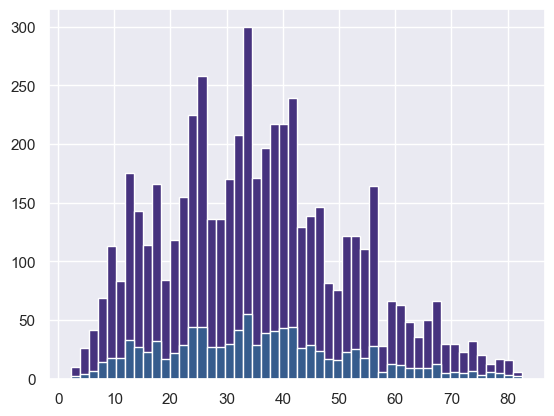

In [5]:
plt.hist(df.Strength, bins=50)
plt.hist(original.Strength, bins=50)
plt.show()

In [6]:
df = pd.concat([df, original])

<Axes: xlabel='Strength', ylabel='Density'>

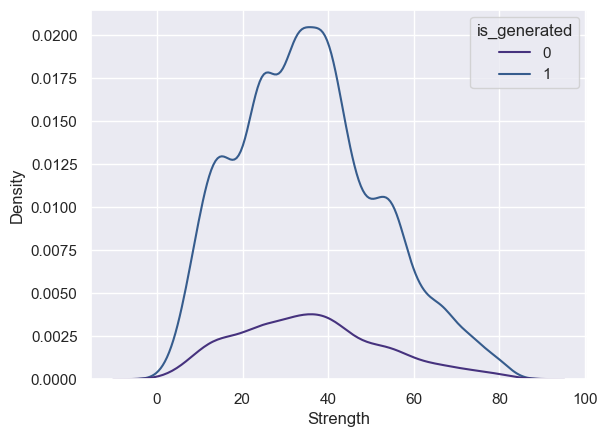

In [7]:
sns.kdeplot(x=df.Strength, hue=df.is_generated)

<Axes: xlabel='CementComponent', ylabel='Density'>

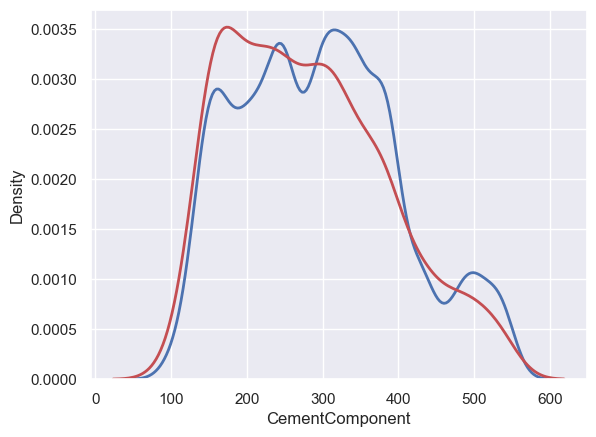

In [8]:
sns.kdeplot(df.CementComponent, color='b', linewidth=2 )
sns.kdeplot(original.CementComponent, color='r', linewidth=2)

<Axes: xlabel='CoarseAggregateComponent', ylabel='Density'>

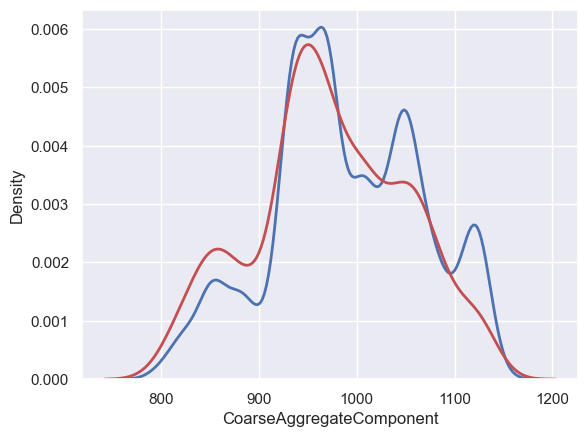

In [9]:
sns.kdeplot(df.CoarseAggregateComponent, color='b', linewidth=2)
sns.kdeplot(original.CoarseAggregateComponent, color='r', linewidth=2)

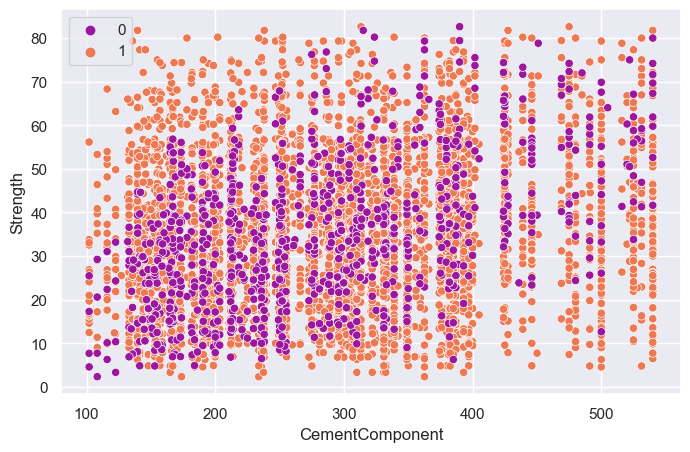

In [10]:
plt.figure(figsize=(8,5))
sns.scatterplot(x=df.CementComponent, y=df.Strength, hue=df.is_generated, palette='plasma')
plt.legend()

<Axes: xlabel='CementComponent', ylabel='Strength'>

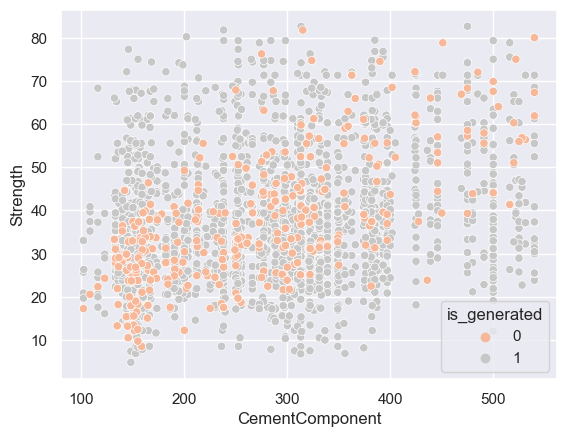

In [11]:
sns.scatterplot(data=df.loc[df.AgeInDays == 28, :], x='CementComponent', y='Strength', hue='is_generated', palette='RdGy')

<Axes: xlabel='CementComponent', ylabel='Strength'>

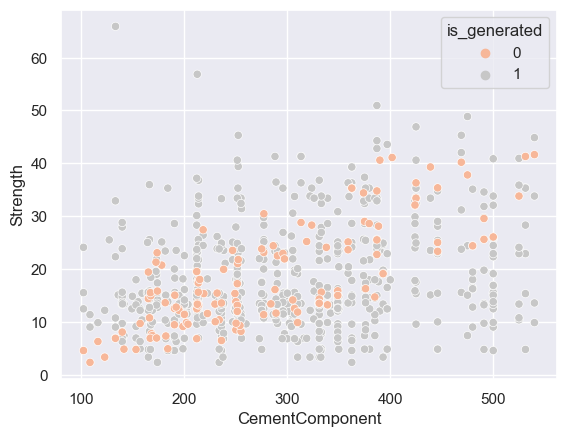

In [12]:
sns.scatterplot(data=df.loc[df.AgeInDays == 3, :], x='CementComponent', y='Strength', hue='is_generated', palette='RdGy')

<Axes: xlabel='Strength', ylabel='Strength'>

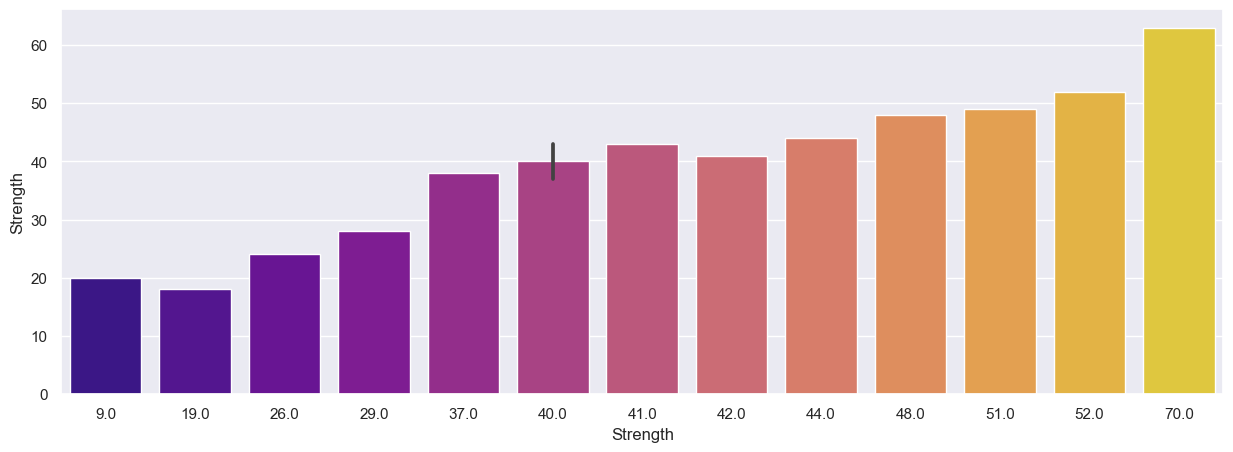

In [13]:
plt.figure(figsize=(15,5))
sns.barplot(x=original.groupby('AgeInDays').mean().round().Strength,
            y =df.groupby('AgeInDays').mean().Strength.round(), palette='plasma')

# EDA

In [14]:
def add_feature(df):
    df['Coarse_Fine'] = df['CoarseAggregateComponent']/df['FineAggregateComponent']
    df['Aggregate'] = df['CoarseAggregateComponent'] + df['FineAggregateComponent']
    df['Aggregate_Cement'] = df['Aggregate']/df['CementComponent']
    df['Slag_Cement'] = df['BlastFurnaceSlag']/df['CementComponent']
    df['Ash_Cement'] = df['FlyAshComponent']/df['CementComponent']
    df['Plastic_Cement'] = df['SuperplasticizerComponent']/df['CementComponent']
    df['Age_Water'] = df['AgeInDays']/df['WaterComponent']

    df['Total_weight'] = df.CementComponent + df.BlastFurnaceSlag + df.FlyAshComponent+ df.SuperplasticizerComponent + df.FineAggregateComponent + df.WaterComponent
    df['WCPR'] = 1/(df.WaterComponent / (df.BlastFurnaceSlag + df.FlyAshComponent + df.CementComponent))

    df['Aggrigate'] = 1/(df.CoarseAggregateComponent + df.FineAggregateComponent)
    df['Cement_age'] = df.CementComponent * df.AgeInDays
    df['Blast_cem'] = (df.BlastFurnaceSlag/df.CementComponent)
    df['Fly_cem'] =  (df.FlyAshComponent/df.CementComponent)
    df['Water_cem'] = 1 / (df.WaterComponent/df.CementComponent)
    df['Plastic_cem'] = df.SuperplasticizerComponent/df.CementComponent
    df['Course_cem'] = 1 / (df.CoarseAggregateComponent/df.CementComponent)
    df['Fine_cem'] = 1 / (df.FineAggregateComponent/df.CementComponent)
    df['Age_cem'] = df.AgeInDays/df.CementComponent
    df['Agg_cem'] = 1 / (df.Aggrigate/df.CementComponent)
    df['Blast_water'] = df.BlastFurnaceSlag/df.WaterComponent
    df['Fly_water'] = df.FlyAshComponent/df.WaterComponent
    df['Plastic_water'] = df.SuperplasticizerComponent/df.WaterComponent
    df['Course_water'] = df.CoarseAggregateComponent/df.WaterComponent
    df['Fine_water'] = df.FineAggregateComponent/df.WaterComponent
    df['Age_water'] = df.AgeInDays/df.WaterComponent
    df['Agg_water'] = df.Aggrigate/df.WaterComponent
    df['Fly_course'] = df.FlyAshComponent / df.CoarseAggregateComponent
    df['Plastic_course'] = df.SuperplasticizerComponent / df.CoarseAggregateComponent
    df['Blast_course'] = df.BlastFurnaceSlag / df.CoarseAggregateComponent
    df['Fin_course'] = df.FineAggregateComponent / df.CoarseAggregateComponent
    df['Age_course'] = df.AgeInDays / df.CoarseAggregateComponent
    df['Agg_course'] = df.Aggrigate / df.CoarseAggregateComponent
    df['Fly_fin'] = df.FlyAshComponent / df.FineAggregateComponent
    df['Plastic_fin'] = df.SuperplasticizerComponent / df.FineAggregateComponent
    df['Blast_fin'] = df.BlastFurnaceSlag / df.FineAggregateComponent
    df['Age_fin'] = df.AgeInDays / df.FineAggregateComponent
    df['Agg_fin'] = df.Aggrigate / df.FineAggregateComponent
    df['Blast_age'] = (df.BlastFurnaceSlag / df.AgeInDays)
    df['Fly_age'] = (df.FlyAshComponent / df.AgeInDays)
    df['Plastic_age'] = (df.SuperplasticizerComponent / df.AgeInDays)
    df['Agg_age'] = 1/(df.Aggrigate / df.AgeInDays)
    df['Fly_agg'] =df.FlyAshComponent / df.Aggrigate
    df['Blast_agg'] = df.BlastFurnaceSlag / df.Aggrigate
    df['Plastic_agg'] = df.SuperplasticizerComponent / df.Aggrigate
    df.WaterComponent = 1 / df.WaterComponent
    df.CoarseAggregateComponent = 1 / df.CoarseAggregateComponent
    df.FineAggregateComponent = 1/ df.FineAggregateComponent
    df.Blast_age = df.Blast_age.apply(lambda num: (1/num) if num != 0 else num)
    df.Fly_age = df.Fly_age.apply(lambda num: (1/num) if num != 0 else num)
    df.Plastic_age = df.Plastic_age.apply(lambda num: (1/num) if num != 0 else num)
    df.Blast_cem= df.Blast_cem.apply(lambda num: (1/num) if num != 0 else num)
    df.Fly_cem =df.Fly_cem.apply(lambda num: (1/num) if num != 0 else num)
    cls = ['CementComponent','WaterComponent','CoarseAggregateComponent',
       'FineAggregateComponent', 'AgeInDays']
    for i in cls:
        df[f"{i}_wcpr"] = 1/(df[i]/df['WCPR'])

    df.AgeInDays_wcpr = 1/df.AgeInDays_wcpr
    
    return df


In [15]:
df = add_feature(df)
val = add_feature(val)

In [16]:
X = df.drop('Strength', axis=1)
y = df.Strength
X_val = val

In [17]:
from sklearn.feature_selection import VarianceThreshold

selection = VarianceThreshold(threshold=0.1)
X = selection.fit_transform(X)
X_val = selection.transform(X_val)

In [18]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [19]:
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)
X_val = sc.transform(X_val)

In [20]:
from sklearn.ensemble import RandomForestRegressor, AdaBoostRegressor, VotingRegressor, GradientBoostingRegressor
from catboost import CatBoostRegressor
from lightgbm import LGBMRegressor
from xgboost import XGBRegressor, XGBRFRegressor

# Model implementation

In [21]:
models = [RandomForestRegressor(), AdaBoostRegressor(),
          LGBMRegressor(),XGBRegressor(),
          XGBRFRegressor(), CatBoostRegressor(), GradientBoostingRegressor()]

model_names =  ['RandomForestRegressor', 'AdaBoostRegressor',
          'LGBMRegressor','XGBRegressor',
          'XGBRFRegressor', 'CatBoostRegressor', 'GradientBoostingRegressor']

mae = []
mse = []
rsme = []
R2_score = []

for model in range(len(models)):
    reg = models[model]
    reg.fit(X_train, y_train)
    pred = reg.predict(X_test)
    mae.append(mean_absolute_error(y_test, pred))
    mse.append(mean_squared_error(y_test, pred))
    rsme.append(np.sqrt(mean_squared_error(y_test, pred)))
    R2_score.append(r2_score(y_test, pred))
    
d = {'Modeling Algo': model_names, 'MAE':mae, 'MSE':mse, 'RSME':rsme, 'R2_Score':R2_score}

Learning rate set to 0.053043
0:	learn: 16.1307076	total: 142ms	remaining: 2m 21s
1:	learn: 15.7664978	total: 145ms	remaining: 1m 12s
2:	learn: 15.4386107	total: 149ms	remaining: 49.4s
3:	learn: 15.1355230	total: 152ms	remaining: 37.9s
4:	learn: 14.8401699	total: 156ms	remaining: 31s
5:	learn: 14.5764966	total: 159ms	remaining: 26.4s
6:	learn: 14.3234520	total: 163ms	remaining: 23.1s
7:	learn: 14.1005465	total: 166ms	remaining: 20.6s
8:	learn: 13.8922374	total: 171ms	remaining: 18.8s
9:	learn: 13.7070326	total: 174ms	remaining: 17.3s
10:	learn: 13.5429205	total: 178ms	remaining: 16s
11:	learn: 13.3660888	total: 182ms	remaining: 15s
12:	learn: 13.2076416	total: 185ms	remaining: 14.1s
13:	learn: 13.0665081	total: 189ms	remaining: 13.3s
14:	learn: 12.9325552	total: 193ms	remaining: 12.7s
15:	learn: 12.8102245	total: 197ms	remaining: 12.1s
16:	learn: 12.7023567	total: 202ms	remaining: 11.7s
17:	learn: 12.6082378	total: 207ms	remaining: 11.3s
18:	learn: 12.5093253	total: 211ms	remaining: 10

165:	learn: 10.7578542	total: 812ms	remaining: 4.08s
166:	learn: 10.7556473	total: 816ms	remaining: 4.07s
167:	learn: 10.7535108	total: 820ms	remaining: 4.06s
168:	learn: 10.7476575	total: 824ms	remaining: 4.05s
169:	learn: 10.7453789	total: 828ms	remaining: 4.04s
170:	learn: 10.7394085	total: 831ms	remaining: 4.03s
171:	learn: 10.7354007	total: 835ms	remaining: 4.02s
172:	learn: 10.7318220	total: 838ms	remaining: 4s
173:	learn: 10.7263259	total: 841ms	remaining: 3.99s
174:	learn: 10.7234413	total: 845ms	remaining: 3.98s
175:	learn: 10.7204108	total: 849ms	remaining: 3.97s
176:	learn: 10.7166922	total: 852ms	remaining: 3.96s
177:	learn: 10.7149168	total: 855ms	remaining: 3.95s
178:	learn: 10.7094261	total: 859ms	remaining: 3.94s
179:	learn: 10.7058414	total: 862ms	remaining: 3.93s
180:	learn: 10.6994370	total: 866ms	remaining: 3.92s
181:	learn: 10.6961764	total: 869ms	remaining: 3.91s
182:	learn: 10.6925396	total: 873ms	remaining: 3.9s
183:	learn: 10.6891191	total: 876ms	remaining: 3.8

338:	learn: 10.1713914	total: 1.42s	remaining: 2.77s
339:	learn: 10.1685955	total: 1.42s	remaining: 2.76s
340:	learn: 10.1645485	total: 1.43s	remaining: 2.76s
341:	learn: 10.1624064	total: 1.43s	remaining: 2.75s
342:	learn: 10.1611584	total: 1.43s	remaining: 2.75s
343:	learn: 10.1592919	total: 1.44s	remaining: 2.74s
344:	learn: 10.1572407	total: 1.44s	remaining: 2.73s
345:	learn: 10.1558409	total: 1.44s	remaining: 2.73s
346:	learn: 10.1518955	total: 1.45s	remaining: 2.72s
347:	learn: 10.1492020	total: 1.45s	remaining: 2.72s
348:	learn: 10.1451059	total: 1.45s	remaining: 2.71s
349:	learn: 10.1426582	total: 1.46s	remaining: 2.71s
350:	learn: 10.1386752	total: 1.46s	remaining: 2.7s
351:	learn: 10.1353972	total: 1.47s	remaining: 2.7s
352:	learn: 10.1306296	total: 1.47s	remaining: 2.69s
353:	learn: 10.1274848	total: 1.47s	remaining: 2.69s
354:	learn: 10.1231602	total: 1.48s	remaining: 2.68s
355:	learn: 10.1216465	total: 1.48s	remaining: 2.68s
356:	learn: 10.1199028	total: 1.48s	remaining: 2

506:	learn: 9.7490836	total: 2.02s	remaining: 1.97s
507:	learn: 9.7472532	total: 2.03s	remaining: 1.97s
508:	learn: 9.7462540	total: 2.03s	remaining: 1.96s
509:	learn: 9.7434642	total: 2.04s	remaining: 1.96s
510:	learn: 9.7415367	total: 2.04s	remaining: 1.95s
511:	learn: 9.7391232	total: 2.04s	remaining: 1.95s
512:	learn: 9.7364764	total: 2.05s	remaining: 1.94s
513:	learn: 9.7343973	total: 2.05s	remaining: 1.94s
514:	learn: 9.7316629	total: 2.06s	remaining: 1.94s
515:	learn: 9.7300920	total: 2.06s	remaining: 1.93s
516:	learn: 9.7288347	total: 2.06s	remaining: 1.93s
517:	learn: 9.7270436	total: 2.06s	remaining: 1.92s
518:	learn: 9.7257200	total: 2.07s	remaining: 1.92s
519:	learn: 9.7240025	total: 2.07s	remaining: 1.91s
520:	learn: 9.7214921	total: 2.08s	remaining: 1.91s
521:	learn: 9.7194444	total: 2.08s	remaining: 1.9s
522:	learn: 9.7175127	total: 2.08s	remaining: 1.9s
523:	learn: 9.7149849	total: 2.09s	remaining: 1.9s
524:	learn: 9.7134529	total: 2.09s	remaining: 1.89s
525:	learn: 9.7

714:	learn: 9.3714410	total: 2.82s	remaining: 1.13s
715:	learn: 9.3696417	total: 2.83s	remaining: 1.12s
716:	learn: 9.3687243	total: 2.83s	remaining: 1.12s
717:	learn: 9.3677562	total: 2.84s	remaining: 1.11s
718:	learn: 9.3654655	total: 2.84s	remaining: 1.11s
719:	learn: 9.3637468	total: 2.84s	remaining: 1.11s
720:	learn: 9.3624351	total: 2.85s	remaining: 1.1s
721:	learn: 9.3601280	total: 2.85s	remaining: 1.1s
722:	learn: 9.3582088	total: 2.85s	remaining: 1.09s
723:	learn: 9.3568743	total: 2.86s	remaining: 1.09s
724:	learn: 9.3540669	total: 2.86s	remaining: 1.08s
725:	learn: 9.3521929	total: 2.87s	remaining: 1.08s
726:	learn: 9.3510905	total: 2.87s	remaining: 1.08s
727:	learn: 9.3488542	total: 2.87s	remaining: 1.07s
728:	learn: 9.3485800	total: 2.88s	remaining: 1.07s
729:	learn: 9.3468283	total: 2.88s	remaining: 1.06s
730:	learn: 9.3459087	total: 2.88s	remaining: 1.06s
731:	learn: 9.3436600	total: 2.89s	remaining: 1.06s
732:	learn: 9.3429671	total: 2.89s	remaining: 1.05s
733:	learn: 9.

898:	learn: 9.1104294	total: 3.62s	remaining: 407ms
899:	learn: 9.1083689	total: 3.63s	remaining: 403ms
900:	learn: 9.1072665	total: 3.64s	remaining: 400ms
901:	learn: 9.1059973	total: 3.64s	remaining: 396ms
902:	learn: 9.1044419	total: 3.65s	remaining: 392ms
903:	learn: 9.1028752	total: 3.65s	remaining: 388ms
904:	learn: 9.1018490	total: 3.66s	remaining: 384ms
905:	learn: 9.1008230	total: 3.66s	remaining: 380ms
906:	learn: 9.0986524	total: 3.66s	remaining: 376ms
907:	learn: 9.0969193	total: 3.67s	remaining: 372ms
908:	learn: 9.0958273	total: 3.67s	remaining: 367ms
909:	learn: 9.0945182	total: 3.67s	remaining: 363ms
910:	learn: 9.0939552	total: 3.68s	remaining: 359ms
911:	learn: 9.0931506	total: 3.68s	remaining: 355ms
912:	learn: 9.0908277	total: 3.68s	remaining: 351ms
913:	learn: 9.0888574	total: 3.69s	remaining: 347ms
914:	learn: 9.0879281	total: 3.69s	remaining: 343ms
915:	learn: 9.0868494	total: 3.69s	remaining: 339ms
916:	learn: 9.0846525	total: 3.7s	remaining: 335ms
917:	learn: 9

In [22]:
pd.DataFrame(d)

,Modeling Algo,MAE,MSE,RSME,R2_Score
0,RandomForestRegressor,9.012112,145.411640,12.058675,0.446566
1,AdaBoostRegressor,9.740122,145.510732,12.062783,0.446189
2,LGBMRegressor,8.673604,131.682457,11.475298,0.498819
3,XGBRegressor,9.001851,142.118567,11.921349,0.459099
4,XGBRFRegressor,8.655190,129.039221,11.359543,0.508879
5,CatBoostRegressor,8.555738,129.446378,11.377450,0.507329
6,GradientBoostingRegressor,8.558050,126.835055,11.262107,0.517268


# parameret tunning

In [23]:
# import xgboost as xgb

# def objective(trial,data=X,target=y):
    
#     train_x, test_x, train_y, test_y = train_test_split(data, target, test_size=0.2,random_state=42)
#     param = {
#         'tree_method':'gpu_hist',  # this parameter means using the GPU when training our model to speedup the training process
#         'lambda': trial.suggest_float('lambda', 1e-3, 10.0),
#         'alpha': trial.suggest_float('alpha', 1e-3, 10.0),
#         'colsample_bytree': trial.suggest_categorical('colsample_bytree', [0.3,0.4,0.5,0.6,0.7,0.8,0.9, 1.0]),
#         'subsample': trial.suggest_categorical('subsample', [0.4,0.5,0.6,0.7,0.8,1.0]),
#         'learning_rate': trial.suggest_categorical('learning_rate', [0.008,0.01,0.012,0.014,0.016,0.018, 0.02]),
#         'n_estimators': trial.suggest_int('n_estimators', 500,1000),
#         'max_depth': trial.suggest_categorical('max_depth', [5,7,9,11,13,15,17]),
#         'random_state': trial.suggest_categorical('random_state', [42]),
#         'min_child_weight': trial.suggest_int('min_child_weight', 1, 300),
#     }
#     model = xgb.XGBRegressor(**param)  
    
#     model.fit(train_x,train_y,eval_set=[(test_x,test_y)],early_stopping_rounds=100,verbose=False)
    
#     preds = model.predict(test_x)
    
#     rmse = mean_squared_error(test_y, preds,squared=False)
    
#     return rmse


In [136]:
# study = optuna.create_study(direction='minimize')
# study.optimize(objective, n_trials=100)
# print('Number of finished trials:', len(study.trials))
# print('Best trial:', study.best_trial.params)

In [ ]:
# study.best_value

In [132]:
# study.best_params

In [ ]:
XGB_params = {'lambda': 5.872895915870506,
 'alpha': 8.665968746264799,
 'colsample_bytree': 0.4,
 'subsample': 1.0,
 'learning_rate': 0.018,
 'n_estimators': 936,
 'max_depth': 5,
 'random_state': 42,
 'min_child_weight': 288}

In [133]:
xgb = XGBRegressor(**XGB_params)
xgb.fit(X_train, y_train)

XGBRegressor(alpha=8.665968746264799, base_score=None, booster=None,
             callbacks=None, colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=0.4, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, lambda=5.872895915870506,
             learning_rate=0.018, max_bin=None, max_cat_threshold=None,
             max_cat_to_onehot=None, max_delta_step=None, max_depth=5,
             max_leaves=None, min_child_weight=288, missing=nan,
             monotone_constraints=None, n_estimators=936, n_jobs=None,
             num_parallel_tree=None, ...)

In [134]:
y_predXGB = xgb.predict(X_test)
y_valXGB = xgb.predict(X_val)

In [135]:
print(r2_score(y_test, y_predXGB))
print(mean_squared_error(y_test, y_predXGB, squared=False))

0.5120698001845918
11.32258084147778


In [32]:
# def objective(trial,data=X,target=y):
    
#     train_x, test_x, train_y, test_y = train_test_split(data, target, test_size=0.2,random_state=42)
#     gpu_params = {'task_type' : "GPU", 'devices' : '0:1'}
#     param = {
#         'learning_rate': trial.suggest_float('learning_rate', 0.001,0.02),
#         'n_estimators': trial.suggest_int('n_estimators', 500,1000),
#         'max_depth': trial.suggest_int('max_depth', 5,10),
#         'random_state': 42,
#         'l2_leaf_reg': trial.suggest_float('l2_leaf_reg', 1, 6),
#         **gpu_params
        
#     }
    
#     model = CatBoostRegressor(**param)
    
#     model.fit(train_x,train_y,eval_set=[(test_x,test_y)],early_stopping_rounds=100,verbose=False)
    
#     preds = model.predict(test_x)
    
#     rmse = mean_squared_error(test_y, preds,squared=False)
    
#     return rmse

In [137]:
# study = optuna.create_study(direction='minimize')
# study.optimize(objective, n_trials=100)
# print('Number of finished trials:', len(study.trials))
# print('Best trial:', study.best_trial.params)

In [138]:
# study.best_params

In [139]:


CAT_params = {'learning_rate': 0.01528807603609496,
 'n_estimators': 832,
 'max_depth': 5,
 'l2_leaf_reg': 1.1940574130580226}

In [140]:
cat = CatBoostRegressor(**CAT_params)
cat.fit(X_train, y_train)

0:	learn: 16.3994515	total: 8.67ms	remaining: 7.21s
1:	learn: 16.2883895	total: 11.1ms	remaining: 4.61s
2:	learn: 16.1821160	total: 13.5ms	remaining: 3.74s
3:	learn: 16.0794377	total: 16ms	remaining: 3.31s
4:	learn: 15.9814793	total: 18.3ms	remaining: 3.02s
5:	learn: 15.8854006	total: 20.5ms	remaining: 2.82s
6:	learn: 15.7844287	total: 23ms	remaining: 2.71s
7:	learn: 15.6949364	total: 25.1ms	remaining: 2.58s
8:	learn: 15.6005296	total: 27.2ms	remaining: 2.49s
9:	learn: 15.5156398	total: 29.5ms	remaining: 2.42s
10:	learn: 15.4283736	total: 31.8ms	remaining: 2.37s
11:	learn: 15.3401930	total: 34.3ms	remaining: 2.34s
12:	learn: 15.2538045	total: 36.7ms	remaining: 2.31s
13:	learn: 15.1714756	total: 39ms	remaining: 2.28s
14:	learn: 15.0885352	total: 41.2ms	remaining: 2.24s
15:	learn: 15.0071905	total: 43.4ms	remaining: 2.21s
16:	learn: 14.9314180	total: 45.5ms	remaining: 2.18s
17:	learn: 14.8550876	total: 47.6ms	remaining: 2.15s
18:	learn: 14.7802500	total: 50.2ms	remaining: 2.15s
19:	learn

173:	learn: 11.4822493	total: 409ms	remaining: 1.55s
174:	learn: 11.4770103	total: 412ms	remaining: 1.55s
175:	learn: 11.4741199	total: 415ms	remaining: 1.55s
176:	learn: 11.4706550	total: 417ms	remaining: 1.54s
177:	learn: 11.4670325	total: 420ms	remaining: 1.54s
178:	learn: 11.4622239	total: 422ms	remaining: 1.54s
179:	learn: 11.4595771	total: 426ms	remaining: 1.54s
180:	learn: 11.4571917	total: 430ms	remaining: 1.55s
181:	learn: 11.4541952	total: 433ms	remaining: 1.54s
182:	learn: 11.4507447	total: 436ms	remaining: 1.54s
183:	learn: 11.4472911	total: 438ms	remaining: 1.54s
184:	learn: 11.4445537	total: 441ms	remaining: 1.54s
185:	learn: 11.4407821	total: 444ms	remaining: 1.54s
186:	learn: 11.4370731	total: 447ms	remaining: 1.54s
187:	learn: 11.4347947	total: 450ms	remaining: 1.54s
188:	learn: 11.4304508	total: 453ms	remaining: 1.54s
189:	learn: 11.4273614	total: 455ms	remaining: 1.54s
190:	learn: 11.4239689	total: 457ms	remaining: 1.53s
191:	learn: 11.4215715	total: 459ms	remaining:

337:	learn: 11.1574237	total: 805ms	remaining: 1.18s
338:	learn: 11.1565486	total: 808ms	remaining: 1.17s
339:	learn: 11.1555573	total: 810ms	remaining: 1.17s
340:	learn: 11.1542090	total: 813ms	remaining: 1.17s
341:	learn: 11.1528735	total: 816ms	remaining: 1.17s
342:	learn: 11.1504396	total: 819ms	remaining: 1.17s
343:	learn: 11.1490544	total: 822ms	remaining: 1.17s
344:	learn: 11.1473647	total: 824ms	remaining: 1.16s
345:	learn: 11.1462585	total: 826ms	remaining: 1.16s
346:	learn: 11.1455588	total: 829ms	remaining: 1.16s
347:	learn: 11.1443332	total: 831ms	remaining: 1.16s
348:	learn: 11.1431741	total: 833ms	remaining: 1.15s
349:	learn: 11.1424130	total: 835ms	remaining: 1.15s
350:	learn: 11.1412772	total: 838ms	remaining: 1.15s
351:	learn: 11.1403056	total: 840ms	remaining: 1.15s
352:	learn: 11.1396978	total: 842ms	remaining: 1.14s
353:	learn: 11.1390138	total: 844ms	remaining: 1.14s
354:	learn: 11.1381038	total: 846ms	remaining: 1.14s
355:	learn: 11.1373828	total: 848ms	remaining:

507:	learn: 10.9752858	total: 1.2s	remaining: 767ms
508:	learn: 10.9740078	total: 1.21s	remaining: 765ms
509:	learn: 10.9735123	total: 1.21s	remaining: 763ms
510:	learn: 10.9723872	total: 1.21s	remaining: 760ms
511:	learn: 10.9707044	total: 1.21s	remaining: 758ms
512:	learn: 10.9698763	total: 1.22s	remaining: 756ms
513:	learn: 10.9689758	total: 1.22s	remaining: 754ms
514:	learn: 10.9682876	total: 1.22s	remaining: 751ms
515:	learn: 10.9672862	total: 1.22s	remaining: 749ms
516:	learn: 10.9661866	total: 1.23s	remaining: 746ms
517:	learn: 10.9651744	total: 1.23s	remaining: 744ms
518:	learn: 10.9640661	total: 1.23s	remaining: 742ms
519:	learn: 10.9626992	total: 1.23s	remaining: 739ms
520:	learn: 10.9616709	total: 1.23s	remaining: 736ms
521:	learn: 10.9610257	total: 1.24s	remaining: 734ms
522:	learn: 10.9602004	total: 1.24s	remaining: 732ms
523:	learn: 10.9595674	total: 1.24s	remaining: 729ms
524:	learn: 10.9588310	total: 1.24s	remaining: 726ms
525:	learn: 10.9580892	total: 1.24s	remaining: 

755:	learn: 10.7268175	total: 1.81s	remaining: 182ms
756:	learn: 10.7256716	total: 1.81s	remaining: 179ms
757:	learn: 10.7247971	total: 1.81s	remaining: 177ms
758:	learn: 10.7239963	total: 1.82s	remaining: 175ms
759:	learn: 10.7228223	total: 1.82s	remaining: 172ms
760:	learn: 10.7210790	total: 1.82s	remaining: 170ms
761:	learn: 10.7203315	total: 1.83s	remaining: 168ms
762:	learn: 10.7192301	total: 1.83s	remaining: 165ms
763:	learn: 10.7185417	total: 1.83s	remaining: 163ms
764:	learn: 10.7175394	total: 1.83s	remaining: 161ms
765:	learn: 10.7166452	total: 1.84s	remaining: 158ms
766:	learn: 10.7158672	total: 1.84s	remaining: 156ms
767:	learn: 10.7147561	total: 1.84s	remaining: 154ms
768:	learn: 10.7137776	total: 1.84s	remaining: 151ms
769:	learn: 10.7126678	total: 1.85s	remaining: 149ms
770:	learn: 10.7116895	total: 1.85s	remaining: 146ms
771:	learn: 10.7110930	total: 1.85s	remaining: 144ms
772:	learn: 10.7097489	total: 1.85s	remaining: 141ms
773:	learn: 10.7088020	total: 1.85s	remaining:

In [141]:
y_predCAT = cat.predict(X_test)
y_valCAT = cat.predict(X_val)

In [142]:
print(r2_score(y_test, y_predCAT))
print(mean_squared_error(y_test, y_predCAT, squared=False))

0.5292056341914377
11.121982542326807


In [40]:
# def objective(trial,data=X,target=y):
    
#     train_x, test_x, train_y, test_y = train_test_split(data, target, test_size=0.2,random_state=42)
#     param = {
#         'metric': 'rmse', 
#         'random_state': 48,
#         'n_estimators':  trial.suggest_int('n_estimators', 500,1000),
#         'reg_alpha': trial.suggest_float('reg_alpha', 1e-3, 10.0),
#         'reg_lambda': trial.suggest_float('reg_lambda', 1e-3, 10.0),
#         'colsample_bytree': trial.suggest_float('colsample_bytree', 0.3, 1.0),
#         'subsample': trial.suggest_float('subsample', 0.4,1.0),
#         'learning_rate': trial.suggest_float('learning_rate', 0.006,0.02),
#         'max_depth': trial.suggest_int('max_depth', 10, 100),
#         'num_leaves' : trial.suggest_int('num_leaves', 1, 1000),
#         'min_child_samples': trial.suggest_int('min_child_samples', 1, 300),
#         'cat_smooth' : trial.suggest_int('min_data_per_groups', 1, 100)
#     }
#     model = LGBMRegressor(**param)  
    
#     model.fit(train_x,train_y,eval_set=[(test_x,test_y)],early_stopping_rounds=100,verbose=False)
    
#     preds = model.predict(test_x)
    
#     rmse = mean_squared_error(test_y, preds,squared=False)
    
#     return rmse

In [143]:
# study = optuna.create_study(direction='minimize')
# study.optimize(objective, n_trials=100)
# print('Number of finished trials:', len(study.trials))
# print('Best trial:', study.best_trial.params)

In [43]:
# study.best_params

{'n_estimators': 581,
 'reg_alpha': 2.8163532957657096,
 'reg_lambda': 7.83638994433814,
 'colsample_bytree': 0.8653754821105314,
 'subsample': 0.7224390710578102,
 'learning_rate': 0.01848238290698337,
 'max_depth': 68,
 'num_leaves': 600,
 'min_child_samples': 272,
 'min_data_per_groups': 100}

In [44]:
# study.best_value

11.325675384426829

In [144]:
LGBM_params = {'n_estimators': 581,
 'reg_alpha': 2.8163532957657096,
 'reg_lambda': 7.83638994433814,
 'colsample_bytree': 0.8653754821105314,
 'subsample': 0.7224390710578102,
 'learning_rate': 0.01848238290698337,
 'max_depth': 68,
 'num_leaves': 600,
 'min_child_samples': 272,
 'min_data_per_groups': 100}

In [145]:
lgbm = LGBMRegressor(**LGBM_params)
lgbm.fit(X_train, y_train)

[LightGBM] [Warning] Unknown parameter: min_data_per_groups


LGBMRegressor(colsample_bytree=0.8653754821105314,
              learning_rate=0.01848238290698337, max_depth=68,
              min_child_samples=272, min_data_per_groups=100, n_estimators=581,
              num_leaves=600, reg_alpha=2.8163532957657096,
              reg_lambda=7.83638994433814, subsample=0.7224390710578102)

In [146]:
y_predLGBM = lgbm.predict(X_test)
y_valLGBM = lgbm.predict(X_val)

In [147]:
print(r2_score(y_test, y_predLGBM))
print(mean_squared_error(y_test, y_predLGBM, squared=False))

0.5108047578603687
11.337249201774977


In [148]:
gb = GradientBoostingRegressor()
gb.fit(X_train, y_train)

GradientBoostingRegressor()

In [149]:
y_predGB = gb.predict(X_test)
y_valGB = gb.predict(X_val)

In [150]:
from sklearn.neural_network import MLPRegressor
mlp = MLPRegressor(max_iter=1000)
mlp.fit(X_train, y_train)

MLPRegressor(max_iter=1000)

In [151]:
y_predMLP = mlp.predict(X_test)
y_valMLP = mlp.predict(X_val)

In [152]:
print(r2_score(y_test, y_predMLP))
print(mean_squared_error(y_test, y_predMLP, squared=False))

0.5164139639339151
11.272064275071079


# coefficent optimaization

In [153]:
# def coeff(trial):
#     a = trial.suggest_float('a', 0, 1)
#     b = trial.suggest_float('b', 0, 1)
#     c = trial.suggest_float('c', 0, 1)
#     d = trial.suggest_float('d', 0, 1)
#     e = trial.suggest_float('e', 0, 1)
    
    
#     res1 = (y_predXGB*a + y_predCAT*b + y_predLGBM*c + y_predGB*d + y_predMLP*e)/(a+b+c+d+e)
#     res = mean_squared_error(y_test, res1, squared=False)

#     return res

# study = optuna.create_study(direction= 'minimize')
# study.optimize(coeff, n_trials= 500)

In [121]:
# study.best_params

{'a': 0.0004059362407387192,
 'b': 0.9466612671537616,
 'c': 0.00014168065084243695,
 'd': 0.02388755465748553,
 'e': 0.141527796431965}

In [122]:
study.best_value

11.12068126988891

In [154]:
weights = {'a': 0.0004059362407387192,
 'b': 0.9466612671537616,
 'c': 0.00014168065084243695,
 'd': 0.02388755465748553,
 'e': 0.141527796431965}

In [155]:
a = weights['a']
b = weights['b']
c = weights['c']
d = weights['d']
e = weights['e']

In [156]:
sum_coef = a + b + c + d + e
a = a / sum_coef
b = b / sum_coef
c = c / sum_coef
d = d/ sum_coef
e = e / sum_coef

a, b, c, d, e

(0.0003648457654614547,
 0.8508364614573353,
 0.0001273391737914755,
 0.021469561693118772,
 0.1272017919102931)

In [157]:
pred = y_predXGB*a + y_predCAT*b + y_predLGBM*c + y_predGB*d + y_predMLP*e

# mertices

In [166]:
print('r2_score: ', r2_score(y_test, pred))
print('RMSE: ', mean_squared_error(y_test, pred, squared=False))

r2_score:  0.530156482472614
RMSE:  11.110745509973949


Text(0, 0.5, 'predictions')

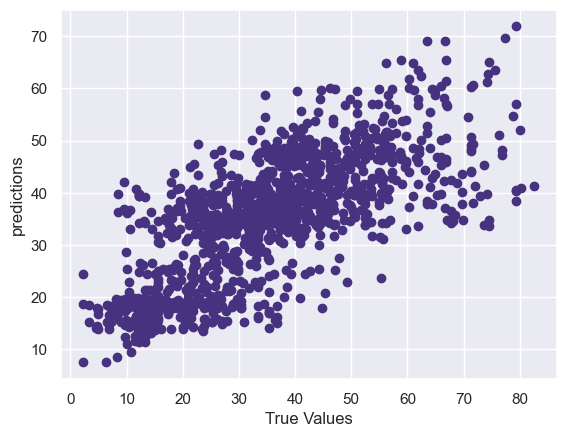

In [165]:
plt.scatter(x=y_test, y=pred)
plt.xlabel('True Values')
plt.ylabel('predictions')

In [160]:
prediction = y_valXGB*a + y_valCAT*b + y_valLGBM*c + y_valXGB*d + y_valMLP*e

In [161]:
submission.Strength = prediction

In [162]:
submission.head()

,id,Strength
0,5407,48.413105
1,5408,18.190941
2,5409,35.710724
3,5410,47.238799
4,5411,29.330332


In [164]:
# submission.to_csv('submission_43.csv', index=False)

# Thank you!